<a href="https://colab.research.google.com/github/H-Jaeseok/SDAproject/blob/main/SDA_Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행 후 런타임 재시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,371 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록(colab)
%matplotlib inline

# 그래프에 retina format 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# sns.set() 쓰지 말것! -> 폰트 지정 옵션 초기화돼서 한글폰트 깨짐

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
# import matplotlib as mpl
# import matplotlib.pyplot as plt


# 데이터 불러오기 및 사전 처리

- 사용 데이터
    - 재정 자립도
    - 재정 자주도
- 기타 고려 변수
    - 과징금 및 과태료

DataFrame 변수 명
 
- df1: 서울시 구별 조사망률 및 사망건수(2015~2021)
- df2: 일반회계 세입결산(과태료 및 과징금)(2015~2021)
- df3: 서울시 구별 재정자립도
- df4: 서울시 구별 재정자주도

In [ ]:
def read_excel(url, **kwargs):
    return pd.read_excel(url, engine='openpyxl', header=None, **kwargs)

# 서울시 구별 조사망률
df_1 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%82%AC%EB%A7%9D%EB%A5%A0%EB%8D%B0%EC%9D%B4%ED%84%B0.xlsx?raw=true")
# 과징금 데이터
df_2 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EA%B3%BC%EC%A7%95%EA%B8%88%EB%8D%B0%EC%9D%B4%ED%84%B0.xlsx?raw=true")
# 서울시 구별 재정자립도
df_3 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%9E%AC%EC%A0%95%EC%9E%90%EB%A6%BD%EB%8F%84.xlsx?raw=true")
# 서울시 구별 재정자주도
df_4 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EC%9E%AC%EC%A0%95%EC%9E%90%EC%A3%BC%EB%8F%84.xlsx?raw=true")

# EDA 및 데이터 전처리

### 서울시 구별 조사망률 및 사망건수

In [ ]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,자치구별,2015,2015,2016,2016,2017,2017,2018,2018,2019,2019,2020,2020,2021,2021
1,자치구별(1),자치구별(2),사망건수,조사망률,사망건수,조사망률,사망건수,조사망률,사망건수,조사망률,사망건수,조사망률,사망건수,조사망률,사망건수,조사망률
2,합계,종로구,829,5.5,823,5.5,826,5.6,897,6,854,5.8,867,6,982,6.9
3,NaN,중구,689,5.6,669,5.5,684,5.7,710,5.8,665,5.5,723,5.9,806,6.7
4,NaN,용산구,1113,4.9,1137,5.1,1150,5.2,1203,5.5,1107,5.1,1145,5.2,1265,5.8


In [ ]:
df_1 = df_1.T
df_1.columns = ["연도", "수치명"] + list(df_1.iloc[1][2:])
df_1 = df_1.iloc[2:]
df_1

,연도,수치명,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2,2015,사망건수,829,689,1113,1244,1472,1833,2050,2154,...,2573,1731,1139,1701,1677,2008,1396,1751,2127,1857
3,2015,조사망률,5.5,5.6,4.9,4.3,4.1,5.2,5,4.7,...,4.4,4.1,4.9,4.6,4.2,4,3.2,3.1,3.3,4
4,2016,사망건수,823,669,1137,1304,1344,1921,2013,2139,...,2594,1794,1163,1643,1667,2137,1480,1780,2174,1791
5,2016,조사망률,5.5,5.5,5.1,4.5,3.8,5.5,5,4.8,...,4.4,4.3,5,4.5,4.2,4.3,3.4,3.2,3.3,4
6,2017,사망건수,826,684,1150,1399,1346,1780,2068,2097,...,2574,1749,1167,1560,1641,2068,1446,1756,2239,1877
7,2017,조사망률,5.6,5.7,5.2,4.7,3.8,5.1,5.1,4.8,...,4.4,4.3,5,4.3,4.2,4.2,3.3,3.2,3.4,4.3
8,2018,사망건수,897,710,1203,1383,1512,1895,2178,2215,...,2759,1922,1133,1659,1720,2179,1435,1796,2334,1905
9,2018,조사망률,6,5.8,5.5,4.6,4.3,5.5,5.4,5.1,...,4.7,4.8,4.9,4.6,4.4,4.4,3.3,3.3,3.6,4.5
10,2019,사망건수,854,665,1107,1369,1385,1851,2049,2184,...,2691,1811,1199,1708,1703,2107,1421,1838,2278,1898
11,2019,조사망률,5.8,5.5,5.1,4.6,4,5.4,5.2,5.1,...,4.6,4.5,5.2,4.7,4.4,4.3,3.4,3.5,3.4,4.5


조사망률과 사망건수로 나누기

In [ ]:
df_1_rate = df_1[df_1["수치명"]=="조사망률"].drop(columns="수치명")
df_1_rate

,연도,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
3,2015,5.5,5.6,4.9,4.3,4.1,5.2,5,4.7,5.7,...,4.4,4.1,4.9,4.6,4.2,4,3.2,3.1,3.3,4
5,2016,5.5,5.5,5.1,4.5,3.8,5.5,5,4.8,5.7,...,4.4,4.3,5,4.5,4.2,4.3,3.4,3.2,3.3,4
7,2017,5.6,5.7,5.2,4.7,3.8,5.1,5.1,4.8,5.9,...,4.4,4.3,5,4.3,4.2,4.2,3.3,3.2,3.4,4.3
9,2018,6,5.8,5.5,4.6,4.3,5.5,5.4,5.1,6.2,...,4.7,4.8,4.9,4.6,4.4,4.4,3.3,3.3,3.6,4.5
11,2019,5.8,5.5,5.1,4.6,4,5.4,5.2,5.1,6,...,4.6,4.5,5.2,4.7,4.4,4.3,3.4,3.5,3.4,4.5
13,2020,6,5.9,5.2,4.7,4.3,5.7,5.8,5.2,6.4,...,4.7,4.7,5.5,4.8,4.6,4.5,3.4,3.5,3.5,4.3
15,2021,6.9,6.7,5.8,5,4.5,6.2,6,5.4,6.8,...,5,5.4,5.8,5.3,4.9,5.1,3.7,3.7,3.9,4.7


In [ ]:
df_1_num = df_1[df_1["수치명"]=="사망건수"].drop(columns="수치명")
df_1_num

,연도,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2,2015,829,689,1113,1244,1472,1833,2050,2154,1854,...,2573,1731,1139,1701,1677,2008,1396,1751,2127,1857
4,2016,823,669,1137,1304,1344,1921,2013,2139,1845,...,2594,1794,1163,1643,1667,2137,1480,1780,2174,1791
6,2017,826,684,1150,1399,1346,1780,2068,2097,1873,...,2574,1749,1167,1560,1641,2068,1446,1756,2239,1877
8,2018,897,710,1203,1383,1512,1895,2178,2215,1960,...,2759,1922,1133,1659,1720,2179,1435,1796,2334,1905
10,2019,854,665,1107,1369,1385,1851,2049,2184,1874,...,2691,1811,1199,1708,1703,2107,1421,1838,2278,1898
12,2020,867,723,1145,1363,1486,1911,2245,2265,1968,...,2694,1892,1245,1746,1770,2209,1433,1867,2300,1901
14,2021,982,806,1265,1420,1516,2061,2319,2320,2036,...,2884,2137,1325,1958,1890,2481,1541,1920,2579,2122


In [ ]:
#사망건수 melt
df_1_num_m = df_1_num.melt(
    id_vars='연도', 
    value_vars=df_1_num.columns[1:],
    var_name="자치구별",
    value_name="사망건수"
    )
df_1_num_m.head()

,연도,자치구별,사망건수
0,2015,종로구,829
1,2016,종로구,823
2,2017,종로구,826
3,2018,종로구,897
4,2019,종로구,854


In [ ]:
#조사망률 melt
df_1_rate_m = df_1_rate.melt(
    id_vars="연도", 
    value_vars=df_1_rate.columns[1:],
    var_name="자치구별",
    value_name="조사망률"
    )
df_1_rate_m.head()

,연도,자치구별,조사망률
0,2015,종로구,5.5
1,2016,종로구,5.5
2,2017,종로구,5.6
3,2018,종로구,6
4,2019,종로구,5.8


In [ ]:
  df_1_melt = pd.concat([df_1_num_m, df_1_rate_m["조사망률"]], axis=1)
  df_1_melt

,연도,자치구별,사망건수,조사망률
0,2015,종로구,829,5.5
1,2016,종로구,823,5.5
2,2017,종로구,826,5.6
3,2018,종로구,897,6
4,2019,종로구,854,5.8
...,...,...,...,...
170,2017,강동구,1877,4.3
171,2018,강동구,1905,4.5
172,2019,강동구,1898,4.5
173,2020,강동구,1901,4.3


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text

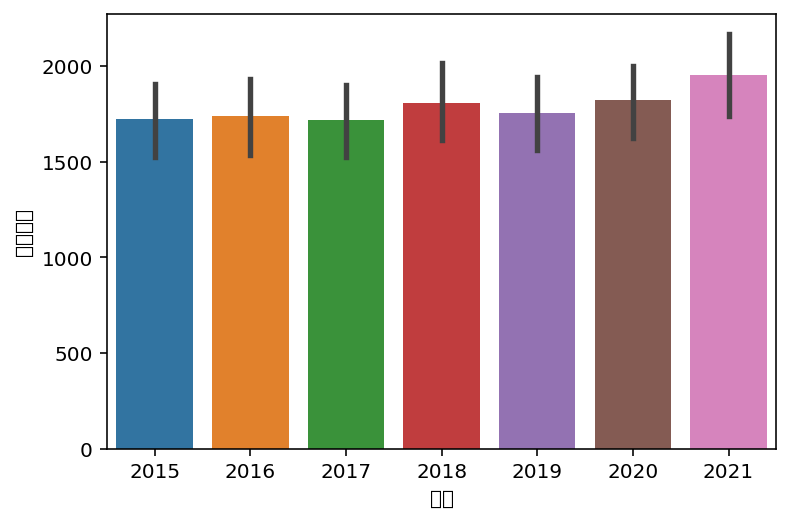

In [ ]:
sns.barplot(x=df_1_melt["연도"], y=df_1_melt["사망건수"])

In [ ]:
df_1_melt.sort_values("사망건수")["자치구별"].unique()

array(['중구', '종로구', '용산구', '금천구', '성동구', '광진구', '서초구', '서대문구', '마포구',
       '영등포구', '동작구', '구로구', '도봉구', '강남구', '동대문구', '강동구', '양천구', '강북구',
       '관악구', '중랑구', '성북구', '송파구', '은평구', '강서구', '노원구'], dtype=object)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_

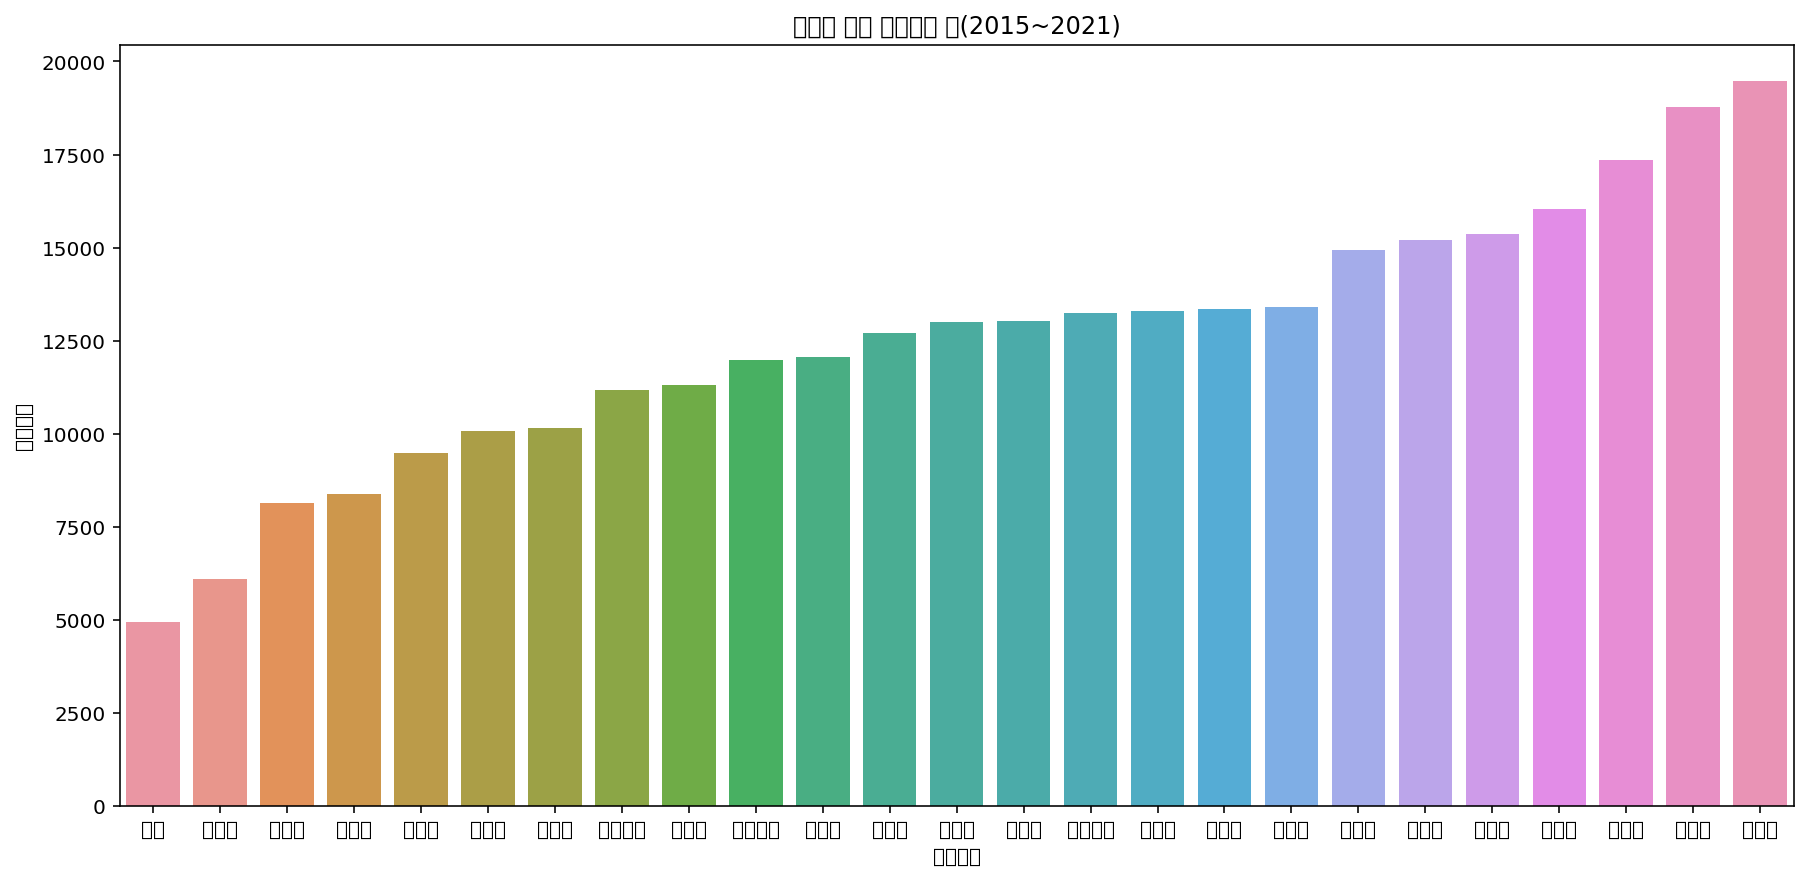

In [ ]:
plt.figure(figsize=(15, 7))
df_temp = df_1_melt.drop(columns="연도").groupby("자치구별").sum().reset_index().sort_values("사망건수")
plt.title("서울시 구별 사망건수 합(2015~2021)")
sns.barplot(x=df_temp["자치구별"], 
            y=df_temp["사망건수"])

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_

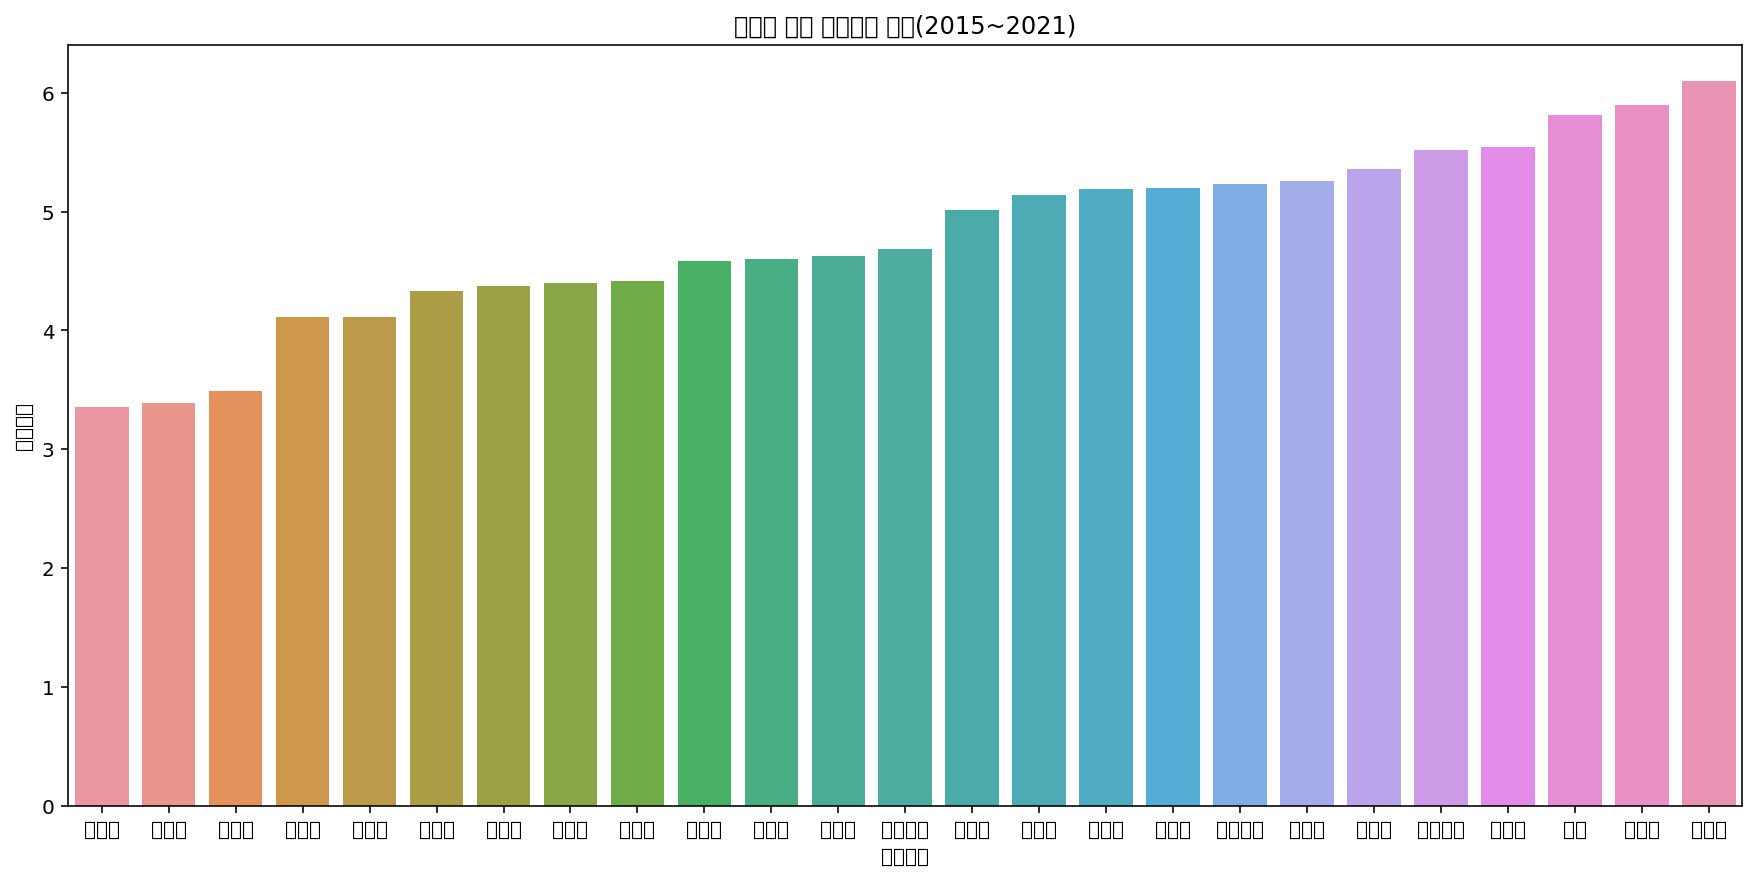

In [ ]:
plt.figure(figsize=(15, 7))
df_temp = df_1_melt.drop(columns="연도").groupby("자치구별").mean().reset_index().sort_values("조사망률")
plt.title("서울시 구별 조사망률 평균(2015~2021)")
sns.barplot(x=df_temp["자치구별"], 
            y=df_temp["조사망률"])

### 과징금 데이터

In [278]:
# 과징금 데이터
df_2 = read_excel("https://github.com/mjuppp1/SDA2022/blob/main/data/%EA%B3%BC%EC%A7%95%EA%B8%88%EB%8D%B0%EC%9D%B4%ED%84%B0.xlsx?raw=true")

In [ ]:
df_2.shape

In [ ]:
df_2.head()

In [328]:
df_2.columns = df_4.iloc[0].apply(lambda x: str(x).replace(".0",""))
df_2 = df_4.iloc[0:]
df_2

,2015,2016,2017,2018,2019,2020,2021
자치구별,,,,,,,
종로구,64.9,66.9,67.8,65.4,63.6,62.2,61.8
중구,62.9,62.5,63.9,61.2,61.1,59.5,59.9
용산구,54.9,57.6,60.0,59.3,55.5,54.6,57.9
성동구,55.2,58.4,57.4,57.5,54.8,53.5,53.0
광진구,55.8,55.3,56.5,53.9,52.0,50.8,49.6
동대문구,50.9,52.6,53.6,51.6,49.0,49.2,49.4
중랑구,49.7,48.7,49.2,46.3,42.9,42.1,42.2
성북구,50.5,51.4,51.0,46.8,46.4,48.2,47.6
강북구,46.2,47.2,47.1,44.1,42.1,43.5,43.5


In [ ]:
#과징금 melt
df_2_melt = df_2.melt(
    id_vars='자치구별', 
    var_name="연도",
    value_name="과징금"
    )
df_2_melt.head()
# 근데 과징금 단위가 얼마지?

,자치구별,연도,과징금
0,종로구,2015,5154
1,중구,2015,7971
2,용산구,2015,2905
3,성동구,2015,2450
4,광진구,2015,1698


##### 없앨거(사유: 데이터 변경에 따른 삭제)

In [ ]:
# df_2_t = df_2[:]
# # 구(시군구의 구) 결측치 채우기
# df_2_t[0] = df_2_t[0].fillna(method="ffill")
# #연도 결측치 채우기(원래 xlsx를 엑셀로 열었을 때의 데이터엔 있음)
# df_2_t.iloc[0] = df_2_t.iloc[0].fillna(method="ffill")

# # 서울시 데이터는 필요 없으므로 제거
# df_2_t = df_2_t[(df_2_t[0] !="서울시")]
# df_2_t.head()

In [ ]:
# #시 (서울시 데이터), 계(합계 데이터) 제거
# df_2_t = df_2_t.T
# df_2_t = df_2_t[(df_2_t[2]!="시") & (df_2_t[2]!="계")].drop(columns=2).T
# # df_2_t.head()

In [ ]:
# #2017년에 빠진 결측치 라벨 채우기
# df_2_t[22].loc[1] = "예산현액"
# df_2_t[25].loc[1] = "결산"
# df_2_t

In [ ]:
# #0번째 행을 column으로
# df_2_t.columns = df_2_t.iloc[0]
# df_2_t = df_2_t.iloc[1:]
# df_2_t.head()

In [ ]:
# df_2_t2 = df_2_t[:]
# df_2_t2

In [ ]:
# df_2_t2.T

In [ ]:
# df_2_t2_total = df_2_t2.T[(df_2_t2.T[1]=="결산") | (df_2_t2.T[1]=="자치구별")].drop(columns=1)
# df_2_t2_total

In [ ]:
# df_2_t2.melt(
#     id_vars="자치구별",
#     value_vars=df_2_t2.columns[2:]
# )[]

In [ ]:
# df_2_t.T

In [ ]:
# df_2_t.iloc[0] = df_2_t.iloc[0].apply(lambda x: x.replace("\u3000\u3000\u3000", "") if isinstance(x, str) else x).fillna(method="ffill")
# df_2_t

In [ ]:
# df_2_t.iloc[0].unique()

### 재정자립도 데이터

#### 재정 자립도 참고사항

1. 재정자립도 = 자체수입(지방세+세외수입) / 일반회계 예산액 *100
2. 평균은 예산순계, 자치단체별을 예산총계 기준임
3. 2010-2011 : ( )는 세입과목 개편전 기준으로 산정한 재정자립도임
4. 2014-2020 : 세입과목 개편후 기준으로 산정한 재정자립도임(2014-2016은 ( )에 해당하는 수치)

출처: https://data.seoul.go.kr/dataList/188/S/2/datasetView.do

In [ ]:
df_3.head()

,0,1,2,3,4,5,6,7
0,자치구별,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
1,종로구,50.0,50.4,50.8,47.4,47.4,47.0,47.2
2,중구,58.6,57.1,58.4,53.4,54.9,53.5,55.3
3,용산구,40.1,41.0,42.4,41.1,39.2,39.3,41.7
4,성동구,34.5,37.3,34.5,34.1,32.5,32.7,33.2


In [ ]:
df_3.columns = df_3.iloc[0].apply(lambda x: str(x).replace(".0",""))
df_3 = df_3.iloc[1:]
df_3

,자치구별,2015,2016,2017,2018,2019,2020,2021
1,종로구,50.0,50.4,50.8,47.4,47.4,47.0,47.2
2,중구,58.6,57.1,58.4,53.4,54.9,53.5,55.3
3,용산구,40.1,41.0,42.4,41.1,39.2,39.3,41.7
4,성동구,34.5,37.3,34.5,34.1,32.5,32.7,33.2
5,광진구,27.4,27.2,28.1,27.1,26.7,26.2,26.1
6,동대문구,27.0,27.8,27.2,25.6,23.8,23.2,24.5
7,중랑구,23.2,21.0,20.6,19.0,18.1,17.5,18.2
8,성북구,22.4,22.8,21.8,19.6,19.6,20.0,20.6
9,강북구,18.6,19.1,18.8,17.6,16.8,16.8,17.2
10,도봉구,19.5,20.4,19.8,18.5,17.8,18.4,18.9


In [ ]:
df_temp = df_3.T.reset_index()
df_temp.columns = df_temp.iloc[0]
df_temp = df_temp.iloc[1:]
df_temp.rename(columns={"자치구별": "연도"}, inplace=True)
df_temp.set_index("연도")
df_temp.head()

,연도,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
1,2015,50.0,58.6,40.1,34.5,27.4,27.0,23.2,22.4,18.6,...,22.4,25.1,27.4,44.2,28.7,21.6,57.4,60.0,42.1,29.2
2,2016,50.4,57.1,41.0,37.3,27.2,27.8,21.0,22.8,19.1,...,22.5,24.8,26.8,42.8,28.7,20.7,57.9,60.0,42.9,30.2
3,2017,50.8,58.4,42.4,34.5,28.1,27.2,20.6,21.8,18.8,...,21.6,24.0,27.2,42.0,27.2,20.6,52.5,58.2,42.8,30.1
4,2018,47.4,53.4,41.1,34.1,27.1,25.6,19.0,19.6,17.6,...,21.5,22.5,25.6,37.9,26.8,19.4,53.4,53.3,39.0,31.0
5,2019,47.4,54.9,39.2,32.5,26.7,23.8,18.1,19.6,16.8,...,19.7,21.8,25.3,35.7,26.0,18.7,53.3,54.4,38.4,22.2


In [ ]:
df_temp

,연도,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
1,2015,50.0,58.6,40.1,34.5,27.4,27.0,23.2,22.4,18.6,...,22.4,25.1,27.4,44.2,28.7,21.6,57.4,60.0,42.1,29.2
2,2016,50.4,57.1,41.0,37.3,27.2,27.8,21.0,22.8,19.1,...,22.5,24.8,26.8,42.8,28.7,20.7,57.9,60.0,42.9,30.2
3,2017,50.8,58.4,42.4,34.5,28.1,27.2,20.6,21.8,18.8,...,21.6,24.0,27.2,42.0,27.2,20.6,52.5,58.2,42.8,30.1
4,2018,47.4,53.4,41.1,34.1,27.1,25.6,19.0,19.6,17.6,...,21.5,22.5,25.6,37.9,26.8,19.4,53.4,53.3,39.0,31.0
5,2019,47.4,54.9,39.2,32.5,26.7,23.8,18.1,19.6,16.8,...,19.7,21.8,25.3,35.7,26.0,18.7,53.3,54.4,38.4,22.2
6,2020,47.0,53.5,39.3,32.7,26.2,23.2,17.5,20.0,16.8,...,21.1,22.2,24.7,36.0,26.4,19.3,54.7,52.3,37.6,26.3
7,2021,47.2,55.3,41.7,33.2,26.1,24.5,18.2,20.6,17.2,...,21.9,22.5,26.3,36.5,29.1,19.7,58.2,54.9,39.8,26.7


In [ ]:
df_temp["연도"]

1    2015
2    2016
3    2017
4    2018
5    2019
6    2020
7    2021
Name: 연도, dtype: object

In [ ]:
df_temp.index = df_temp["연도"]
df_temp.drop(columns="연도", inplace=True)
df_temp

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
연도,,,,,,,,,,,,,,,,,,,,,
2015,50.0,58.6,40.1,34.5,27.4,27.0,23.2,22.4,18.6,19.5,...,22.4,25.1,27.4,44.2,28.7,21.6,57.4,60.0,42.1,29.2
2016,50.4,57.1,41.0,37.3,27.2,27.8,21.0,22.8,19.1,20.4,...,22.5,24.8,26.8,42.8,28.7,20.7,57.9,60.0,42.9,30.2
2017,50.8,58.4,42.4,34.5,28.1,27.2,20.6,21.8,18.8,19.8,...,21.6,24.0,27.2,42.0,27.2,20.6,52.5,58.2,42.8,30.1
2018,47.4,53.4,41.1,34.1,27.1,25.6,19.0,19.6,17.6,18.5,...,21.5,22.5,25.6,37.9,26.8,19.4,53.4,53.3,39.0,31.0
2019,47.4,54.9,39.2,32.5,26.7,23.8,18.1,19.6,16.8,17.8,...,19.7,21.8,25.3,35.7,26.0,18.7,53.3,54.4,38.4,22.2
2020,47.0,53.5,39.3,32.7,26.2,23.2,17.5,20.0,16.8,18.4,...,21.1,22.2,24.7,36.0,26.4,19.3,54.7,52.3,37.6,26.3
2021,47.2,55.3,41.7,33.2,26.1,24.5,18.2,20.6,17.2,18.9,...,21.9,22.5,26.3,36.5,29.1,19.7,58.2,54.9,39.8,26.7


In [ ]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_temp)

In [ ]:
df_3_melt = df_3.melt(id_vars="자치구별", 
          value_vars=df_3.columns[1:],
          var_name="연도",
          value_name="재정자립도")
df_3_melt.head()

In [ ]:
#구별로 보기
plt.figure(figsize=(15, 7))
sns.boxplot(x="자치구별", y="재정자립도", data=df_3_melt)

In [ ]:
# 연도별로 보기
plt.figure(figsize=(15, 7))
sns.boxplot(x="연도", y="재정자립도", data=df_3_melt)

### 재정 자주도 데이터

In [ ]:
df_4.head()

In [ ]:
df_4.columns = df_4.iloc[0].apply(lambda x: str(x).replace(".0",""))
df_4 = df_4.iloc[1:]
df_4.head()

In [ ]:
df_4_melt = df_4.melt(id_vars="자치구별", 
          value_vars=df_3.columns[1:],
          var_name="연도",
          value_name="재정자주도")
df_4_melt.head()

In [ ]:
df_data = pd.concat([
    df_1_melt.sort_values(["연도", "자치구별"]),
    df_2_melt.sort_values(["연도", "자치구별"])["과징금"],
    df_3_melt.sort_values(["연도", "자치구별"])["재정자립도"],
    df_4_melt.sort_values(["연도", "자치구별"])["재정자주도"]
], axis=1)
df_data.head()

- `df_data`가 최종 전처리된 데이터프레임입니다. 

# 상관분석

## 가설 설정

## 상관 분석 조건 확인

In [ ]:
print(df_1_rate)
df_1_rate.iloc[:,2]

In [ ]:
#정규성 검증 : 샤피로 테스트
import math
from scipy.stats import shapiro
 #자치구별 사망률 data 정규성 검정         #1~25 -> 종로구~강동구 

for i in range(1,26):
  if (shapiro(df_1_rate.iloc[:,i]).pvalue > 0.05):
    print("자치구", i," : ",shapiro(df_1_rate.iloc[:,i]))
  else:
    print("자치구", i,"기각 : ",shapiro(df_1_rate.iloc[:,i])) 

#𝐻0: data가 normal distribution을 따른다. (p-value > 0.05 인경우)
# 자치구 2는 p-value < 0.05 이므로, data가 normal을 따른다고 볼 수 없다. 자치구 2 = 중구

In [ ]:
print(df_2.T)
print(df_2.T.iloc[1:,24])
#shapiro(df_2.T.iloc[1:,24])

In [ ]:
#df_2.T.iloc[1:,i]
#자치구별 과징금 data 정규성 검정         #0~24 -> 종로구~강동구 

for i in range(0,25):
  if (shapiro(df_2.T.iloc[1:,i]).pvalue > 0.05):
    print("자치구", i," : ",shapiro(df_2.T.iloc[1:,i]))
  else:
    print("자치구", i,"기각 : ",shapiro(df_2.T.iloc[1:,i])) 

#𝐻0: data가 normal distribution을 따른다. (p-value > 0.05 인경우)
# 모든 자치구가 정규성을 따른다.

In [ ]:
print(df_temp) # df3 재정자립도
df_temp.iloc[:,[0,13,18,24]]

In [ ]:
#재정자립도 data 정규성 검정         #0~24 -> 종로구~강동구 

for i in range(0,25):
  if (shapiro(df_temp.iloc[:,i]).pvalue > 0.05):
    print("자치구", i," : ",shapiro(df_temp.iloc[:,i]))
  else:
    print("자치구", i,"기각 : ",shapiro(df_temp.iloc[:,i]))

#𝐻0: data가 normal distribution을 따른다. (p-value > 0.05 인경우)
# 자치구 0,10은 p-value < 0.05 이므로, data가 normal을 따른다고 볼 수 없다. 자치구 0,10 = 종로구,노원구

In [ ]:
print(df_4.T)
print(df_4.T.iloc[2:9,24])     # df_4 재정자주도   #0~24 -> 종로구~강동구

In [ ]:
#df_4.T 재정자주도
#자치구별 재정자주도 data 정규성 검정         #0~24 -> 종로구~강동구

for i in range(0,25):
  if (shapiro(df_4.T.iloc[2:9,i]).pvalue > 0.05):
    print("자치구", i," : ",shapiro(df_4.T.iloc[2:9,i]))
  else:
    print("자치구", i,"기각 : ",shapiro(df_4.T.iloc[2:9,i])) 

#𝐻0: data가 normal distribution을 따른다. (p-value > 0.05 인경우)
# 자치구 13,18은 p-value < 0.05 이므로, data가 normal을 따른다고 볼 수 없다. 자치구 13,18 = 마포구,영등포구

피어슨의 상관계수를 통한 상관분석 진행.
전제 1. 두 변수는 모두 연속형 변수 (만족)
     2. 두 변수중 적어도 한 변수는 정규성 만족해야함 (만족)

### 가설검정
귀무가설 (H0) :모 집단에서 두변수 사이에 선형적인 상관성이 없다.
대립가설 (H1): 모 집단에서 두변수 사이에 선형적인 상관성이 있다.

지역 재정지표 관련 변수와 사망률과의 상관분석 진행.
연도별 상관계수 값을 구한 후 , 통계적 유의성 검토.

In [364]:
#재정자주도 data # 2014, 2022 열 delete
#df_4 = df_4.set_index("자치구별")   
#print(df_4.loc["종로구"])
DF4 = df_4.loc["종로구"].values.tolist()
DF4_1 = df_4.loc["중구"].values.tolist()
#df_temp   #  재정자립도 data
#print(df_temp.종로구)
DF3 = df_temp.종로구.values.tolist()
DF3_1 = df_temp.중구.values.tolist()
#과징금 데이터
#df_2 = df_2.set_index("자치구별")
#print(df_2.loc["종로구"])
DF2 = df_2.loc["종로구"].values.tolist()
DF2_1 = df_2.loc["중구"].values.tolist()
#사망률
#df_1_rate
#print(df_1_rate.종로구)
#print(df_1_rate.종로구.values)
#print(df_1_rate.종로구.values.tolist())
DF1 = df_1_rate.종로구.values.tolist()
DF1_1 = df_1_rate.중구.values.tolist()

In [366]:
#각 자치구별 사망률과 재정지표의 상관계수
#재정지표 : 자립도,자주도,과징금   
                                    # 상관분석 = 데이터프레임 열 끼리 비교
#종로구
abc1 = pd.DataFrame({"사망률":DF1, "과징금":DF2, "자립도":DF3, "자주도":DF4})
#중구
abc2 =  pd.DataFrame({"사망률":DF1_1, "과징금":DF2_1, "자립도":DF3_1, "자주도":DF4_1})

## 상관 분석 진행 및 결과 정리

In [373]:
#피어슨의 상관계수 (r) 계산
corr1 = abc1.corr(method = 'pearson')
print("종로구",corr1)

corr2 = abc2.corr(method = 'pearson')
print("\n중구",corr2)

종로구           사망률       과징금       자립도       자주도
사망률  1.000000 -0.729320 -0.698415 -0.729320
과징금 -0.729320  1.000000  0.845173  1.000000
자립도 -0.698415  0.845173  1.000000  0.845173
자주도 -0.729320  1.000000  0.845173  1.000000

중구           사망률       과징금       자립도       자주도
사망률  1.000000 -0.582311 -0.298705 -0.582311
과징금 -0.582311  1.000000  0.853950  1.000000
자립도 -0.298705  0.853950  1.000000  0.853950
자주도 -0.582311  1.000000  0.853950  1.000000


# 회귀분석


## 가설 설정

## 회귀 분석 조건 확인

### 가설 검정

## 회귀 분석 진행 및 결과 정리

# 결론